# Exploratory Data Analysis

#### Exploratory Data Analysis regers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

Importing the Libraries

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import random
import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

### Information About the Dataset
The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines.


The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. 


The dataset  contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate.

In [80]:
# importing the dataset
data = pd.read_excel("C:\\Users\\ANIL\\Downloads\\ameo2015.xlsx")
data

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.30,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.40,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.00,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.60,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.00,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,train,47916,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,52.09,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,train,752781,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.00,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,train,355888,320000,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,train,947111,200000,2014-07-01,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,1992-03-20,78.72,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [57]:
data.head() # displays the top 5 rows of the dataset

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,0,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,1,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,0,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,1,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,1,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [58]:
data.shape # displays the number of rows and columns of dataset

(3998, 39)

In [59]:
data.info() #gives information about the dataframe i.e., index dtype,column dtypes,non-null values and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   int32         
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

### Data Cleaning

In [60]:
data.isnull().sum() # used to check the number of missing values in the dataset 

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [61]:
data.describe() # computes sumary of statistics

,ID,Salary,Gender,10percentage,12graduation,12percentage,CollegeID,CollegeTier,Degree,collegeGPA,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,0.760630,77.925443,2008.087544,74.466366,5156.851426,1.925713,0.209355,71.486171,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,0.426752,9.850162,1.653599,10.999933,4802.261482,0.262270,0.746231,8.167338,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,0.000000,43.000000,1995.000000,40.000000,2.000000,1.000000,0.000000,6.450000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,1.000000,71.680000,2007.000000,66.000000,494.000000,2.000000,0.000000,66.407500,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,1.000000,79.150000,2008.000000,74.400000,3879.000000,2.000000,0.000000,71.720000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,1.000000,85.670000,2009.000000,82.600000,8818.000000,2.000000,0.000000,76.327500,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,1.000000,97.760000,2013.000000,98.700000,18409.000000,2.000000,3.000000,99.930000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [8]:
data.describe(include='all')

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3998,3.998000e+03,3.998000e+03,3998,3998,3998,3998,3998,3998,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
unique,1,NaN,NaN,81,67,419,339,2,1872,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,train,NaN,NaN,2014-07-01 00:00:00,present,software engineer,Bangalore,m,1991-01-01 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3998,NaN,NaN,199,1875,539,627,3041,11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,1991-06-01 00:00:00,NaN,NaN,NaN,NaN,1977-10-30 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2015-12-01 00:00:00,NaN,NaN,NaN,NaN,1997-05-27 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,6.637945e+05,3.076998e+05,NaN,NaN,NaN,NaN,NaN,NaN,77.925443,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,NaN,3.632182e+05,2.127375e+05,NaN,NaN,NaN,NaN,NaN,NaN,9.850162,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,NaN,1.124400e+04,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,43.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,NaN,3.342842e+05,1.800000e+05,NaN,NaN,NaN,NaN,NaN,NaN,71.680000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200


In [62]:
data.corr() # displays the association between two variables or features of a dataset

,ID,Salary,Gender,10percentage,12graduation,12percentage,CollegeID,CollegeTier,Degree,collegeGPA,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
ID,1.000000,-0.247294,0.016201,0.044547,0.673102,0.007069,0.284540,0.035160,-0.041118,0.047144,...,0.482626,-0.026147,0.104454,-0.049272,-0.017871,0.175557,0.024837,0.120979,-0.146289,0.031359
Salary,-0.247294,1.000000,0.033659,0.177373,-0.161383,0.170254,-0.118690,-0.179332,-0.021102,0.130103,...,-0.100720,0.018475,-0.047598,-0.022691,0.037639,-0.064148,0.057423,-0.010213,-0.054685,-0.011312
Gender,0.016201,0.033659,1.000000,-0.171300,-0.057158,-0.129616,-0.037128,-0.044914,0.005776,-0.175987,...,-0.002420,0.094429,0.028241,-0.012795,0.012961,-0.086648,-0.086946,-0.005549,0.005749,-0.098152
10percentage,0.044547,0.177373,-0.171300,1.000000,0.269957,0.643378,0.021082,-0.126042,-0.250270,0.312538,...,-0.018933,0.050364,0.074419,0.049378,0.030002,0.067657,0.136645,-0.004679,-0.132496,0.036692
12graduation,0.673102,-0.161383,-0.057158,0.269957,1.000000,0.259166,0.254021,0.027691,-0.341691,0.086001,...,0.293439,0.035459,0.123751,0.023470,-0.004727,0.103329,0.041182,0.061956,-0.074369,-0.015069
12percentage,0.007069,0.170254,-0.129616,0.643378,0.259166,1.000000,0.022336,-0.100771,-0.222313,0.346137,...,-0.043534,0.037635,0.064001,0.044201,0.005910,0.058299,0.103998,-0.007486,-0.094369,0.006332
CollegeID,0.284540,-0.118690,-0.037128,0.021082,0.254021,0.022336,1.000000,0.067054,-0.059252,0.017240,...,0.102303,-0.009291,0.022933,0.025620,0.005749,0.076432,-0.005264,0.005917,-0.008973,-0.010678
CollegeTier,0.035160,-0.179332,-0.044914,-0.126042,0.027691,-0.100771,0.067054,1.000000,-0.006164,-0.086781,...,0.001053,-0.021548,0.002594,0.000007,-0.033722,0.055174,-0.038055,0.009970,0.023778,-0.019179
Degree,-0.041118,-0.021102,0.005776,-0.250270,-0.341691,-0.222313,-0.059252,-0.006164,1.000000,0.083172,...,0.023468,-0.062325,-0.052533,-0.082542,-0.023426,-0.000575,-0.032352,0.004038,0.028148,0.003198
collegeGPA,0.047144,0.130103,-0.175987,0.312538,0.086001,0.346137,0.017240,-0.086781,0.083172,1.000000,...,0.007601,-0.031765,0.052258,-0.005226,-0.018950,0.069582,0.068282,-0.032684,-0.074859,0.028071


### Univariate Analysis

In [10]:
data['Degree'].value_counts()

B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: Degree, dtype: int64

In [11]:
data['Degree'].unique()

array(['B.Tech/B.E.', 'MCA', 'M.Tech./M.E.', 'M.Sc. (Tech.)'],
      dtype=object)

In [12]:
data['12board'].value_counts()

cbse                                                       1400
state board                                                1254
0                                                           359
icse                                                        129
up board                                                     87
                                                           ... 
p u board, karnataka                                          1
up bord                                                       1
wbscte                                                        1
state  board of intermediate education, andhra pradesh        1
certificate for higher secondary education (chse)orissa       1
Name: 12board, Length: 340, dtype: int64

In [13]:
data['12board'].unique()

array(['board of intermediate education,ap', 'cbse', 'state board',
       'mp board', 'isc', 'icse', 'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', 0, 'bseb', 'chse', 'puc',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc', 'isc board',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'isce', 'upboard', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermediate sta

In [14]:
data['Specialization'].value_counts()

electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
information science engineering                 27
electronics and instrumentation engineering     27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
chemical engineering                             9
applied electronics and instrum

In [15]:
data['Specialization'].unique()

array(['computer engineering',
       'electronics and communication engineering',
       'information technology', 'computer science & engineering',
       'mechanical engineering', 'electronics and electrical engineering',
       'electronics & telecommunications',
       'instrumentation and control engineering', 'computer application',
       'electronics and computer engineering', 'electrical engineering',
       'applied electronics and instrumentation',
       'electronics & instrumentation eng',
       'information science engineering', 'civil engineering',
       'mechanical and automation', 'industrial & production engineering',
       'control and instrumentation engineering',
       'metallurgical engineering',
       'electronics and instrumentation engineering',
       'electronics engineering', 'ceramic engineering',
       'chemical engineering', 'aeronautical engineering', 'other',
       'biotechnology', 'embedded systems technology',
       'electrical and power engi

In [16]:
data['Designation'].value_counts()

software engineer                         539
software developer                        265
system engineer                           205
programmer analyst                        139
systems engineer                          118
                                         ... 
project administrator                       1
sap functional consultant                   1
operation engineer                          1
field based employee relations manager      1
sr. database engineer                       1
Name: Designation, Length: 419, dtype: int64

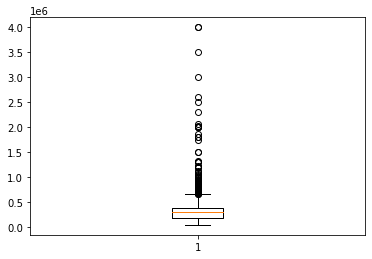

In [17]:
plt.boxplot(data['Salary'])
plt.show()

#### In Salary,some values are extremely high and called as outliers.

<AxesSubplot:xlabel='Salary', ylabel='Density'>

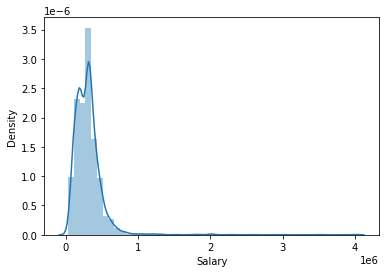

In [18]:
sns.distplot(data['Salary'])

<AxesSubplot:>

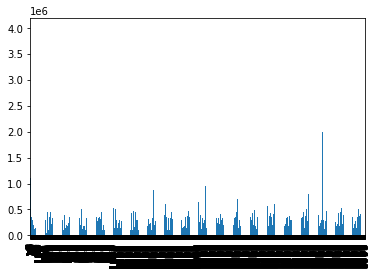

In [19]:
data['Salary'].plot.bar()

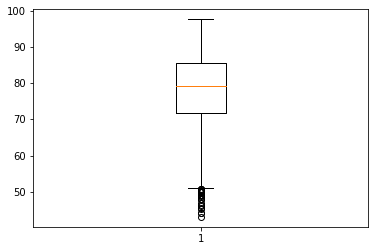

In [20]:
plt.boxplot(data['10percentage'])
plt.show()

##### In 10 percentage, some values are extremely low.

<AxesSubplot:xlabel='10percentage', ylabel='Density'>

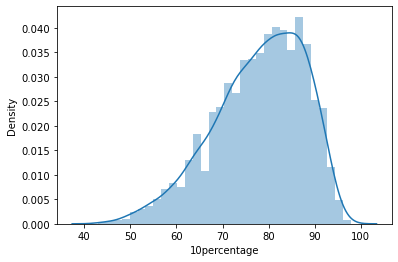

In [21]:
sns.distplot(data['10percentage'])

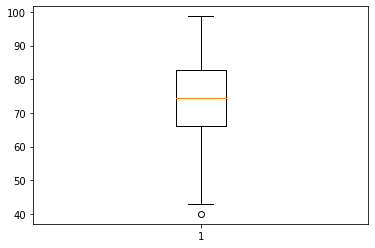

In [22]:
plt.boxplot(data['12percentage'])
plt.show()

<AxesSubplot:xlabel='12percentage', ylabel='Density'>

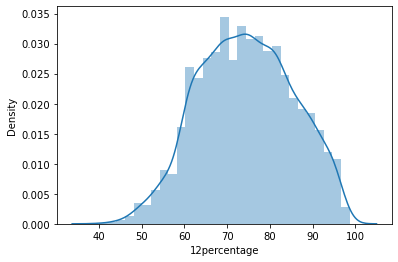

In [23]:
sns.distplot(data['12percentage'])

<AxesSubplot:ylabel='Frequency'>

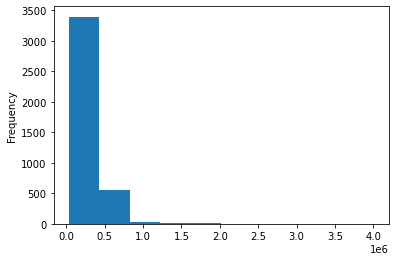

In [24]:
data['Salary'].plot.hist(bins=10)

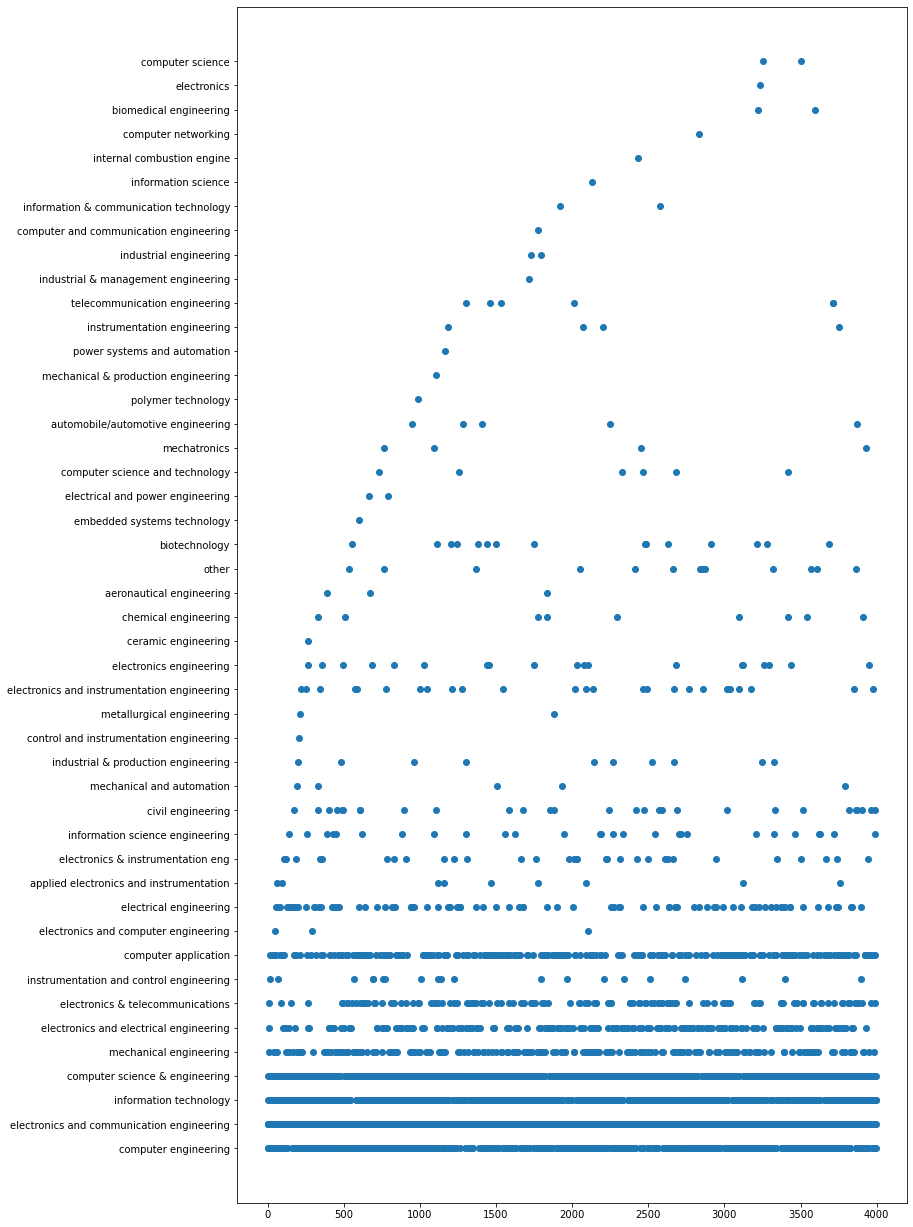

In [25]:
plt.figure(figsize=(12,22))
plt.scatter(data.index, data['Specialization'])

<AxesSubplot:ylabel='Specialization'>

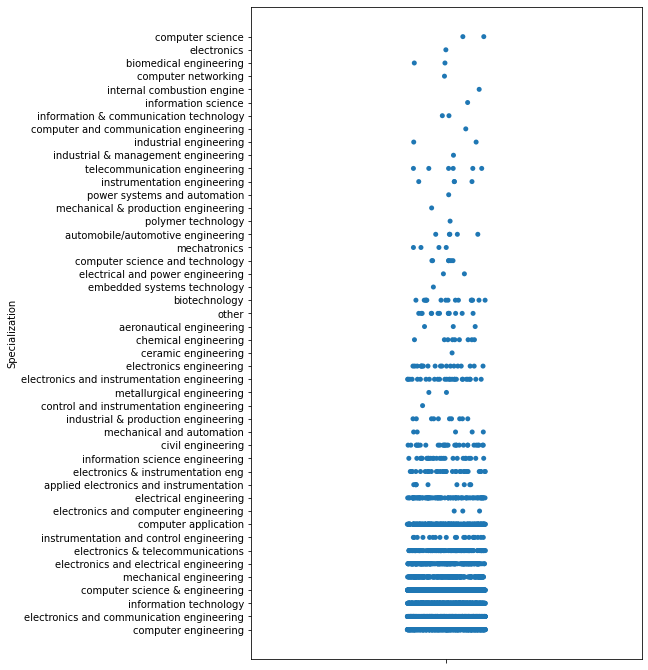

In [26]:
plt.figure(figsize=(7,12))
sns.stripplot(y=data['Specialization'])

In [27]:
males=data['Gender'].where(data['Gender']=='m').count()
females=data['Gender'].where(data['Gender']=='f').count()
print('Number of Male Persons:{}'.format(males))
print('Number of Female Persons:{}'.format(females))
print('Male Female Ratio:[:.2f]'.format(males/females))

Number of Male Persons:3041
Number of Female Persons:957
Male Female Ratio:[:.2f]


<AxesSubplot:>

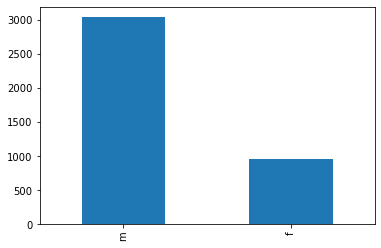

In [28]:
data['Gender'].value_counts().plot(kind='bar')

###### Bar plot Of Gender category

### Bivariate Analysis

<AxesSubplot:xlabel='Gender', ylabel='Salary'>

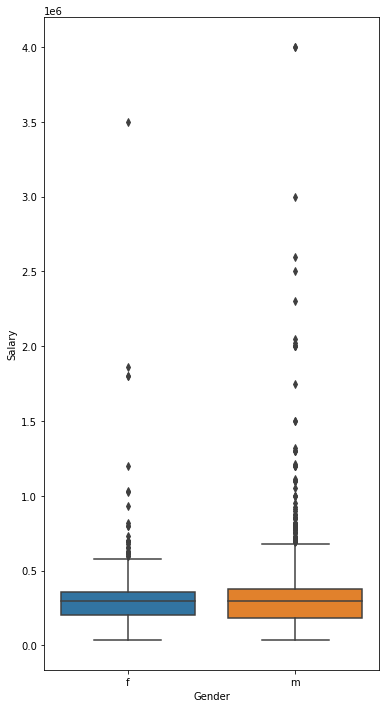

In [29]:
plt.figure(figsize=(6,12))
sns.boxplot(y='Salary',x='Gender',data=data)

##### higher outliers are present in the male category i.e., salaries above normal are earned by males 

<AxesSubplot:xlabel='Logical', ylabel='Salary'>

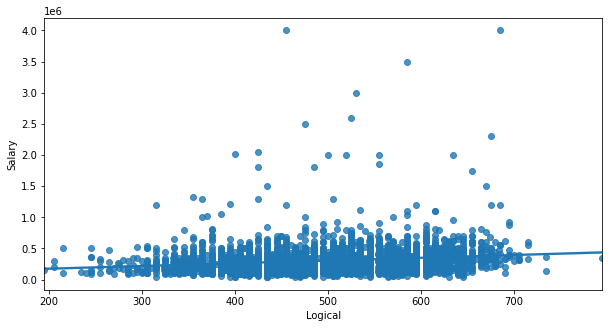

In [30]:
plt.figure(figsize=(10,5))
sns.regplot(x='Logical',y='Salary',data=data)

##### Above shows the positive correlation between the columns Logical and Salary 

<AxesSubplot:xlabel='ComputerProgramming', ylabel='Salary'>

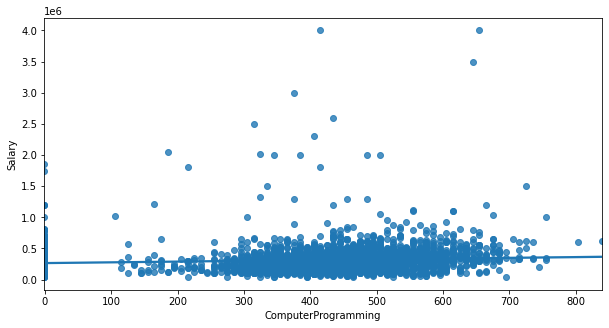

In [31]:
plt.figure(figsize=(10,5))
sns.regplot(x='ComputerProgramming',y='Salary',data=data)

###### Positive correlation between ComputerProgramming and Salary

<AxesSubplot:xlabel='Salary', ylabel='Specialization'>

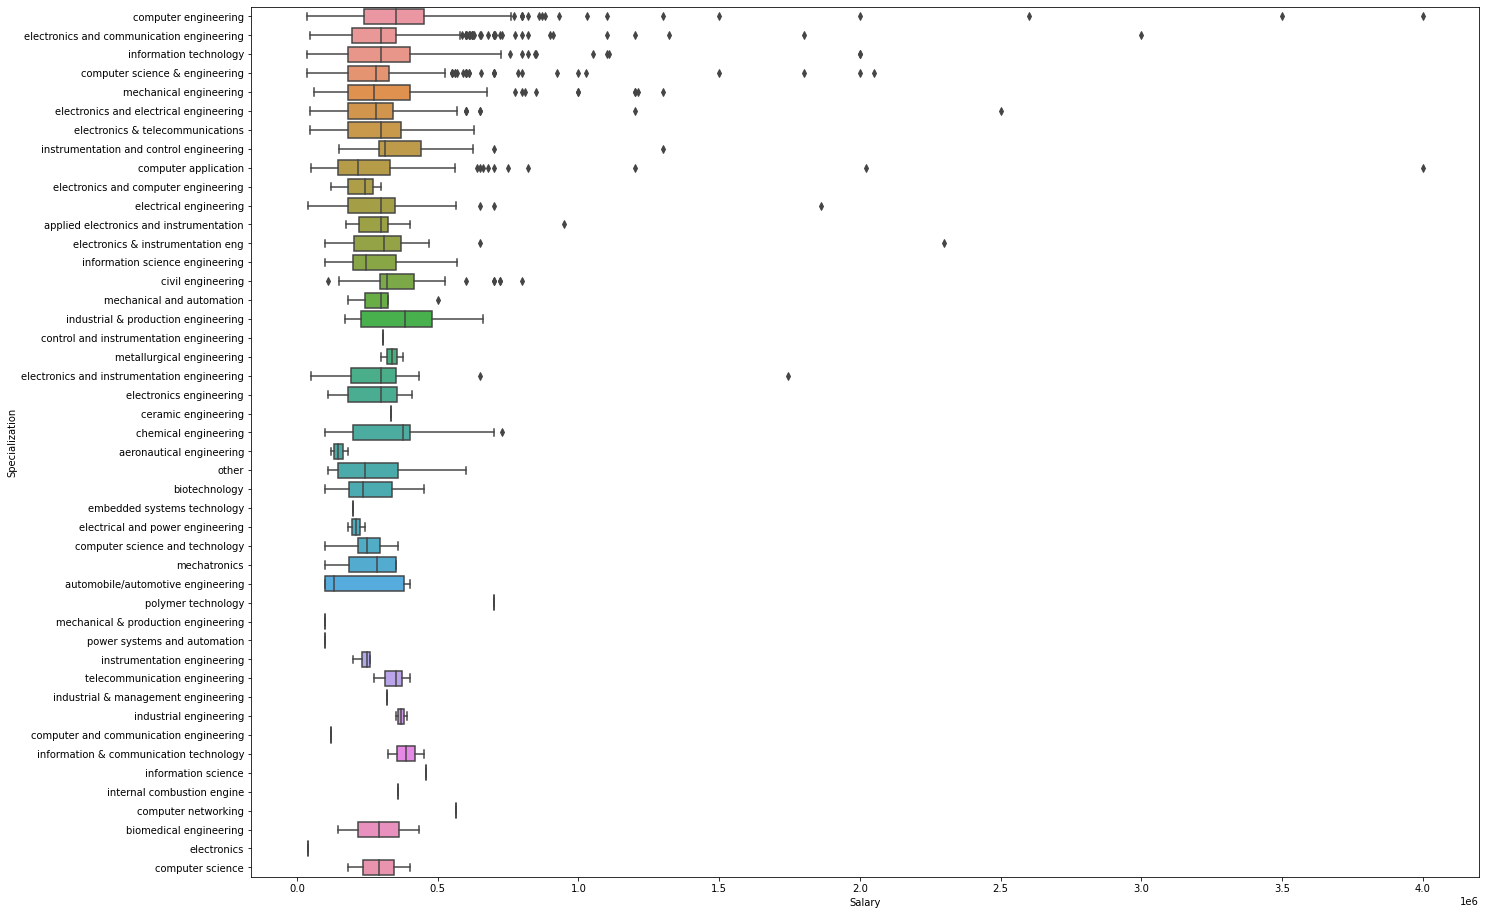

In [32]:
plt.figure(figsize=(22,16))
sns.boxplot(x='Salary',y='Specialization',data=data)

##### Boxplot visualization of Salary and Specialisation 

<AxesSubplot:xlabel='Degree', ylabel='Salary'>

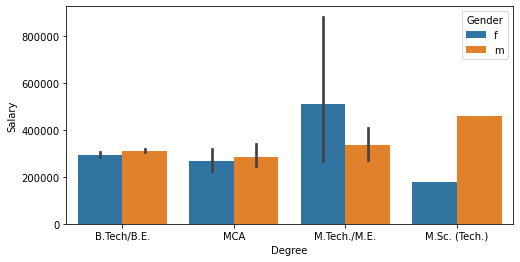

In [33]:
plt.figure(figsize=(8,4))
sns.barplot(x='Degree', y='Salary', data=data, hue='Gender')

##### The female salaries are high who did M.Tech or M.E.

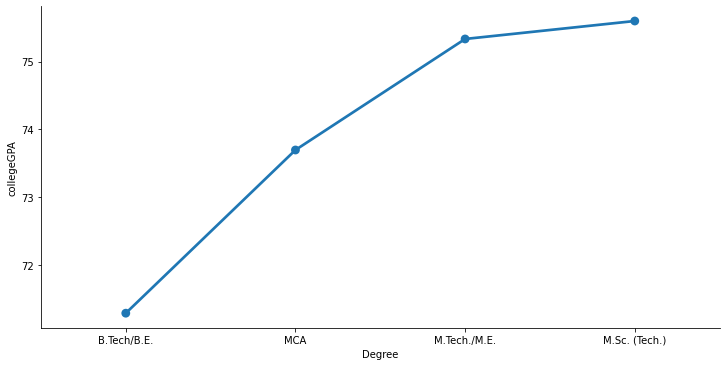

In [34]:
sns.factorplot(x='Degree',y='collegeGPA',data=data,ci=None,size=5,aspect=2)

<AxesSubplot:>

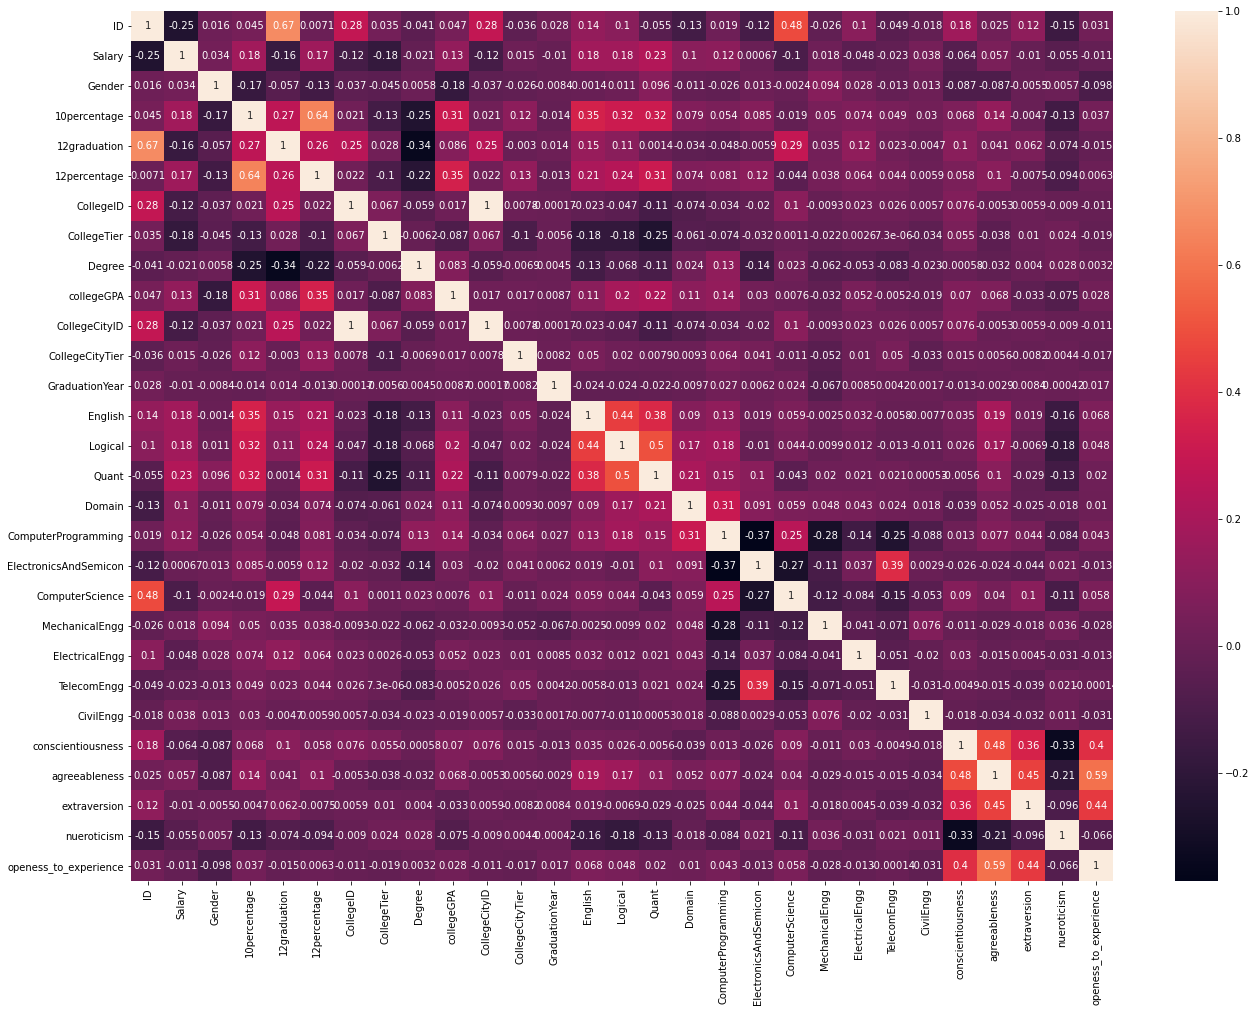

In [64]:
plt.figure(figsize=(22,16))
sns.heatmap(data.corr(),annot=True)

##### Correlation matrix of the dataset 

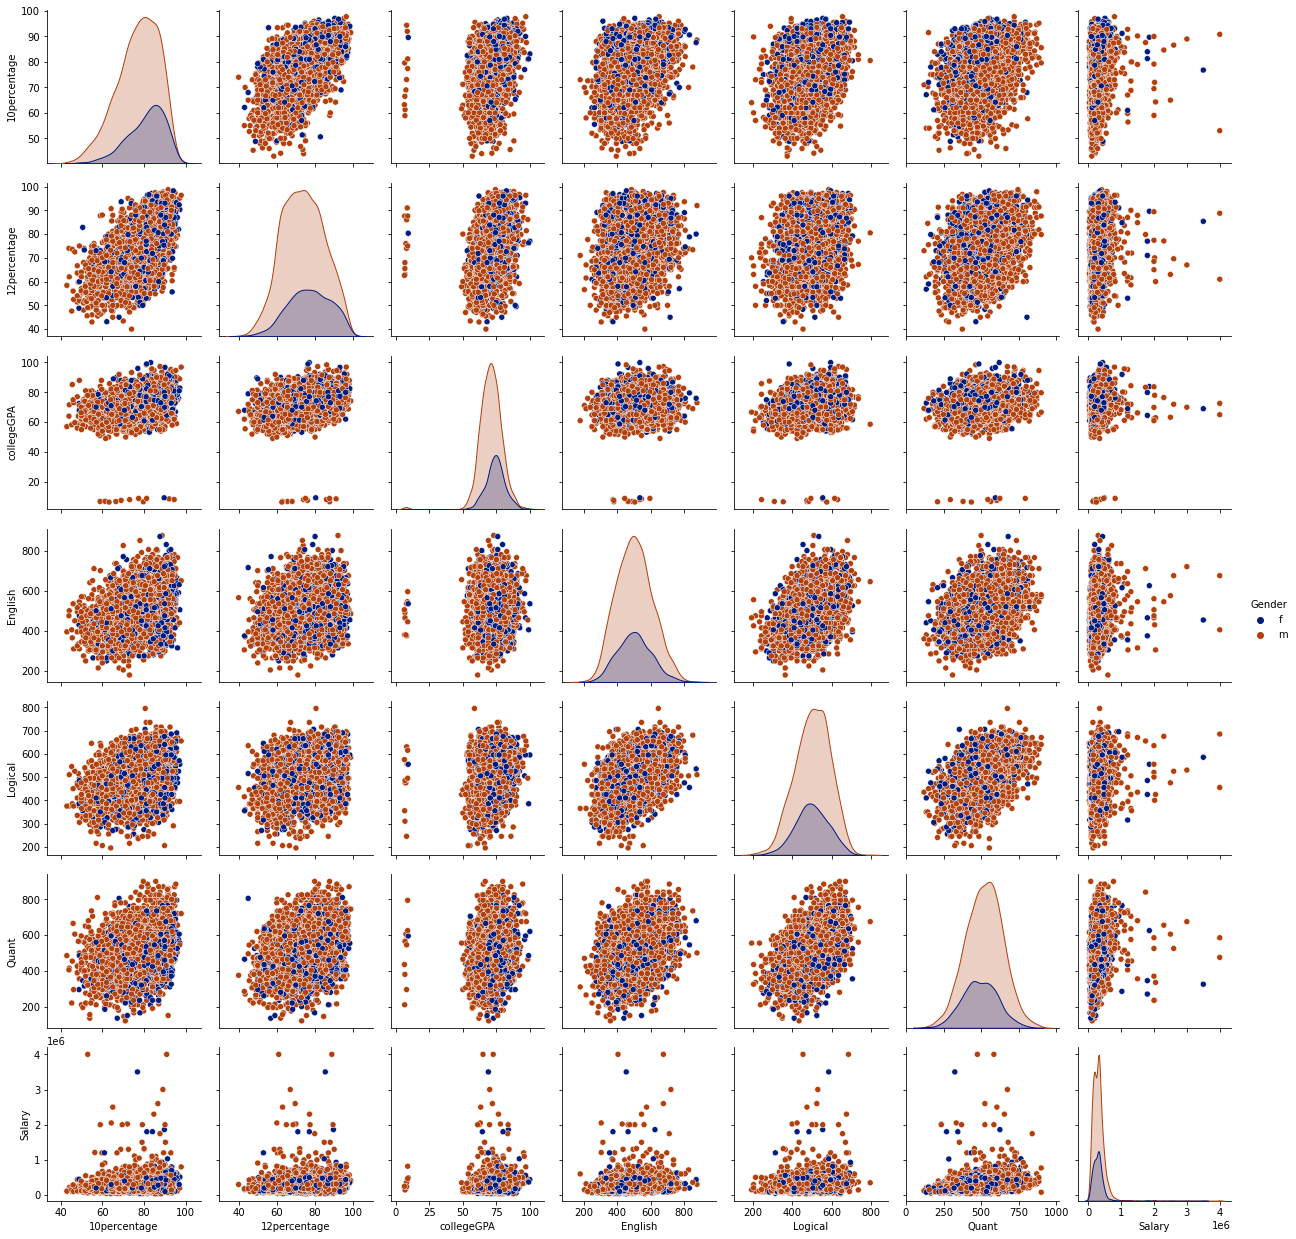

In [36]:
df = data[['10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant', 'Gender','Specialization', 'Salary']]
sns.pairplot(df, hue='Gender',palette='dark')

##### Pairplot of different features of the given dataset

## Research Question

####  Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer,Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.Test this claim with the given data.

Step - 1:
Alternate Hypothesis (Bold claim):$$ H_1: \  ? $$Null Hypothesis (Status Quo):$$ H_0: \ ? $$

Step - 2:

Compute sample mean$$ \bar{x} \ = \ ? $$
Compute sample standard deviation$$ \sigma \ = \ ? $$
Step - 3: Compute Test Statistic:$$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}$$

Step - 4: Decide $ \alpha $ or significance level

Step - 5: Accept or Reject the hypothesis 

In [37]:
# z_score for sampling distributions
def z_score(sample_size, sample_mean, pop_mean, pop_std):
    numerator = sample_mean - pop_mean
    denomenator = pop_std / sample_size**0.5
    return numerator / denomenator

In [38]:
df1 = data[(data['Designation']=='programmer analyst') | (data['Designation'
]=='software engineer') |
(data['Designation']=='associate software engineer') | (data['Designation']=='electrical engineer')]
df2 = data[['Salary']]

In [39]:
samples = random.sample(range(0, df2.shape[0]), 100)
sample_mean = df2.iloc[samples, 0].mean()
print(sample_mean)

333050.0


In [40]:
std = data['Salary'].std()
print(std)

212737.4999568574


In [41]:
confidence_level = 0.95
alpha = 1 - confidence_level
z_critical = norm.ppf(1 - alpha) # Left tailed Z score for 95% Confidence Level
print(z_critical)

1.6448536269514722


In [42]:
# sample and population parameters
sample_size = 100
sample_mean = sample_mean
pop_mean = df2['Salary'].mean()
pop_std = std
print(pop_mean)

307699.8499249625


In [43]:
# Calculating the z-score
z = z_score(sample_size, sample_mean, pop_mean, pop_std)
print(z)

1.1916164324662288


Text(333050.0, 0.0007, 'x_bar')

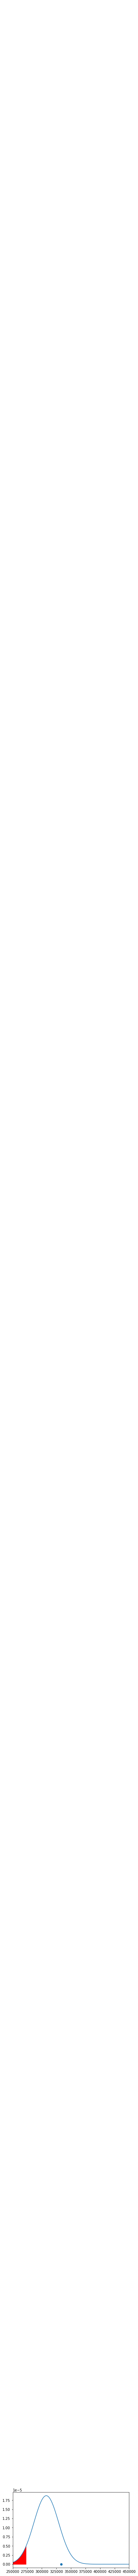

In [44]:
# Ploting the sampling distribution with rejection regions
# Defining the x minimum and x maximum
x_min = 250000
x_max = 450000
# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = pop_std / sample_size**0.5
# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)
# Computing the left critical value (left tailed Test)
z_critical_left = pop_mean - (z_critical * std)
# Shading the left rejection region
x2 = np.linspace(x_min, z_critical_left, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='red')
# Ploting the sample mean and concluding the results
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))

In [45]:
# Conclusion using z test
if(np.abs(z) > z_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [46]:
# Conclusion using p test
p_value = 2 * (1.0 - norm.cdf(np.abs(z)))
print("p_value = ", p_value)
if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.2334116787420375
Fail to reject Null Hypothesis


##### Conclusion: After hypothesis testing we can conclde that people who are at the position of programmer analyst , software engineer,associate software engineer or electrical engineer are getting salary around 350000.

## Column Standardisation

StandardScaler() will normalize the features i.e. each column of X, INDIVIDUALLY so that each column/feature/variable will have μ = 0 and σ = 1

In [47]:
from sklearn import preprocessing
standard_10percentage = preprocessing.scale(data['10percentage'])
print(standard_10percentage)

[ 0.64723345  0.75892071  0.71830716 ...  0.39949082  0.08067447
 -0.74378053]


In [48]:
standard_12percentage = preprocessing.scale(data['12percentage'])
print(standard_12percentage)

[ 1.93967569  0.95772873 -0.56974433 ... -0.81523107 -0.41699702
 -0.58792853]


In [49]:
standard_Salary = preprocessing.scale(data['Salary'])
print(standard_Salary)

[ 0.52794734  0.90404468  0.08133175 ...  0.05782567 -0.50632033
  0.43392301]


## Label Encoding

Label encoding convert the data in machine readable form, but it assigns a unique number(starting from 0) to each class of data

In [50]:
label_encoder = preprocessing.LabelEncoder()

In [52]:
data['Degree']= label_encoder.fit_transform(data['Degree'])

In [53]:
data.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [54]:
data['Gender']= label_encoder.fit_transform(data['Gender'])

In [55]:
data.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,0,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,1,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,0,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,1,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,1,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


### Dummy Variables

In [81]:
data1 = pd.get_dummies(data['JobCity'])

In [82]:
data1.head()

,-1,Chennai,Delhi,Mumbai,Pune,ariyalur,bangalore,mumbai,"A-64,sec-64,noida",AM,...,sampla,shahibabad,singaruli,sonepat,thane,trivandrum,udaipur,vapi,vizag,vsakhapttnam
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
data['JobCity']=pd.factorize(data.JobCity)[0]

In [84]:
data.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,0,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,1,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,2,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,3,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,4,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [85]:
data['Designation']=pd.factorize(data.Designation)[0]
data.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,0,0,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,1,1,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,2,2,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,3,3,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,4,4,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
